### `Normalization`

- **Normalization** is a technique often applied as part of data preparation for machine learning.
- The goal of **Normalization** is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- It is the best way to remove the units when we work in machine learning, as different units have different scales, like `height` and `weight` both is continuous data but have different scales. So it is always better to bring things under same scale. This is the objective of **Normalization**.


- Types of **Normalization**:
    - **Min Max Scaling**
        - This is most used technique.
        - Here we need to know the `maximum` and `minimum` value out of the distribution of that column.
        - Here the transformation took place by the following formula:
        - **$X_{transformed}$ = ($X_{i}$ - $X_{min}$) / ($X_{max}$ - $X_{min}$)**
        - Where $X_{min}$ is the minimum value and $X_{max}$ is the maximum value
        - Here the new distribution will range between `0` to `1`.
       
    - **Mean Normalization**
        - Here we normalize a distribution having numeric value with the mean value of that distribution.
        - The formula is:
        - **$X_{transformed}$ = ($X_{i}$ - $X_{mean}$) / ($X_{max}$ - $X_{min}$)**
        - Here we are doing `mean` centering like we do in **Standardization**.
        - Here we ill get the transformed distribution between the range of `-1` to `1`. If the `value < mean` then we will get negative number and if `value > mean` then we will get positive value.
        - This technique is very rarely used so there is no module in **Scikitlearn**, so we need to write the code by ourselves if we want to apply this technique.
        - It is useful in those algorithms where we need **centered data**. But we can use **Standardization** instead of this, as that also perform the same task.
        
    - **Max Absolute Scaling**
        - Here we scaled a distribution having numeric value with the mean absolute value.
        - The formula is:
        - **$X_{transformed}$ = $X_{i}$ / |$X_{max}$|**
        - Where **|$X_{max}$|** is absolute value of $X_{max}$
        - There is a module in **Scikitlearn** named **MaxAbsScaled**. This model we get in **Preprocessing** class of **Sklearn**.
        - This mainly used where there is **sparse data**(There are too many `0` values in that distribution).
        
    - **Robust Scaling**
        - Here we normalize a distribution having numeric value with outliers.
        - The formula is:
        - **$X_{transformed}$ = ($X_{i}$ - $X_{median}$) / IQR**
        - Where **IQR** is **($75_{th}$ Percentile - $25_{th}$ Percentile)**
        - There is a module in **Scikitlearn** named **RobustScaler**. This model we get in **Preprocessing** class of **Sklearn**.
        - **The distribution we get through this normalization technique is robust to outliers**. This perform a little better than others if there are to many outliers in the distribution.
        
        

**Remember these are all tools so we cannot say which one will work better than others. So we need to do experiments with all these tools and see which one perform better than others in which condition.**

### Normalization vs Standardization

- Is **Feature Scaling** require to perform in that dataset to solve the problem?
- If Scaling is required then remember that most of the problems get solved using **Standardization**. This is why **StandardScaler** is used most of the time.
- The **MinMaxScaler** is mostly used when we know from start about the minimum and maximum value of the distribution. Example: image processing in CNN, as there all the pixels value is between a range of 0(minimum) and 255(maximum).

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Here we use only the 1st 3 columns

df = pd.read_csv('datasets/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


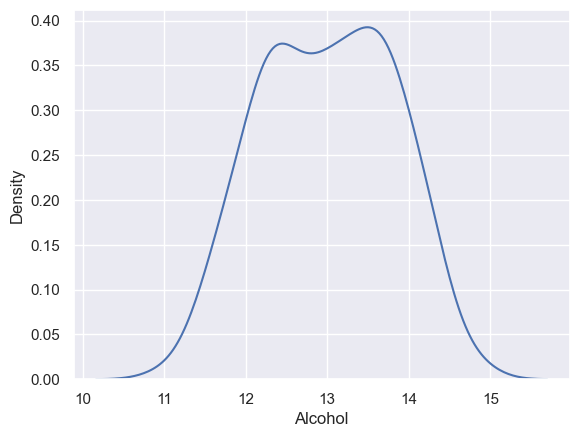

In [5]:
# Checking the distribution of the 'Alcohol' column

sns.kdeplot(df['Alcohol'])
plt.show()

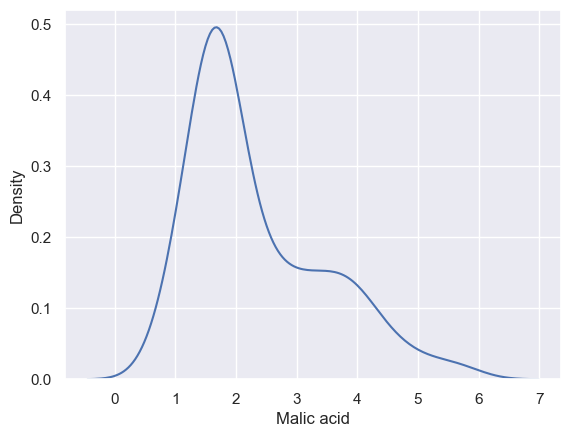

In [6]:
# Checking the distribution of the 'Malic acid' column


sns.kdeplot(df['Malic acid'])
plt.show()

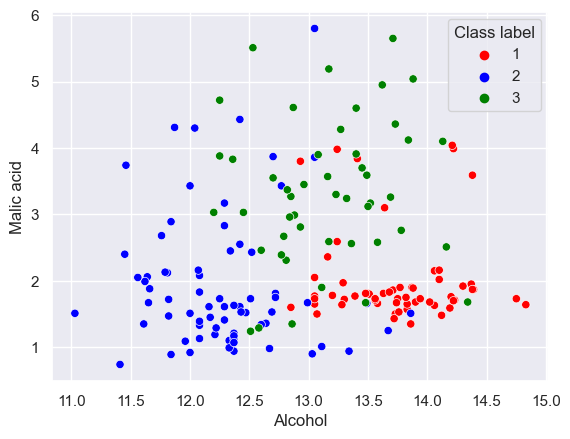

In [7]:
# Scatterplot between these two columns on the basis of 'Class label'

color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue=df['Class label'], palette=color_dict)
plt.show()

#### Always perform the train test split at the beging of scaling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

#### Now doing the `MinMaxScaling`

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Converting the numpy array back to a dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
# Unscaled data

np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
# Scaled data

np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


**Notes:**

- Here `mean` and `sd` may behave differently, but `min` to `max` all values will get scaled down between `0` to `1` scale.

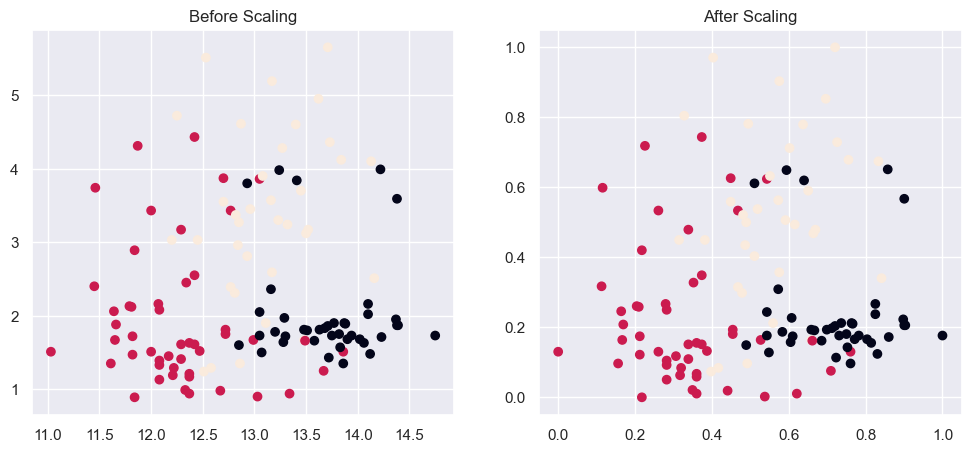

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

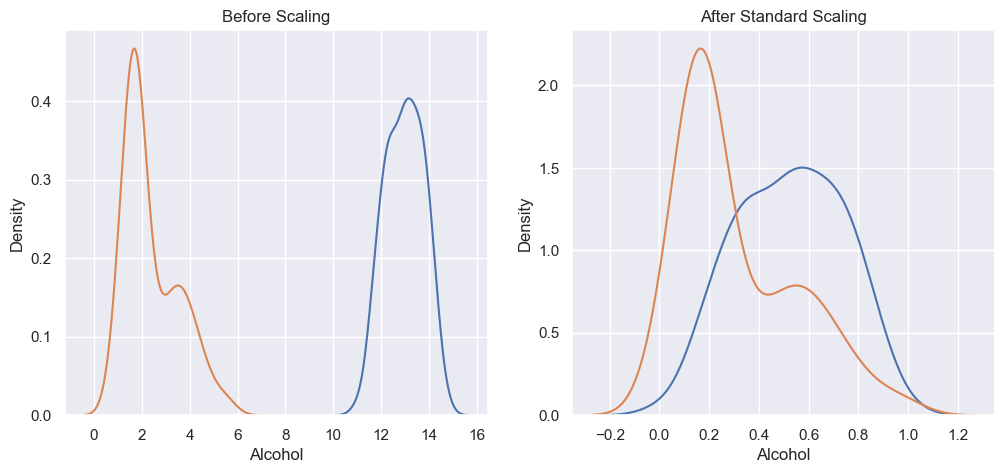

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

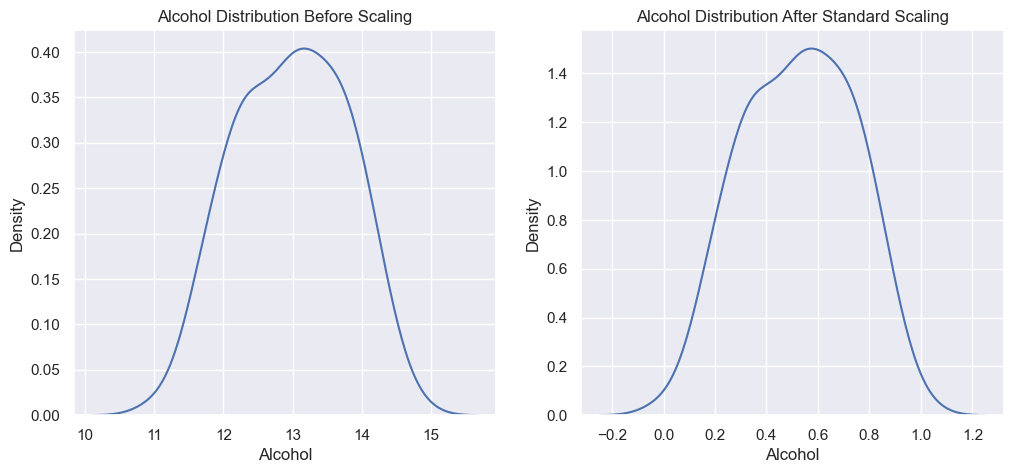

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

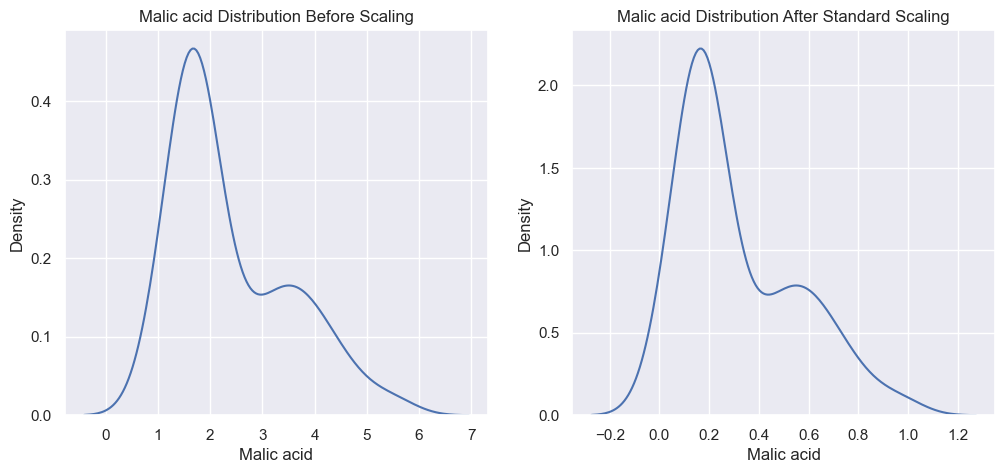

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

**Notes:**

- Here only the scale gets changed while the distribution remain the same.
- Here if there is outliers in the data then that also gets scaled down. It is not a good thing.